### Study the back-propagation algorithm. Implement a classifier for the loan data with Decision as the output attribute. Prepare the data as needed. Submit the notebook file.

Name: Jhalak Surve

NUID: 002748800

In [35]:
# Importing the necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [36]:
loan_df = pd.read_excel('loan.xlsx')
loan_df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [37]:
loan_df.describe()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,31.510163,4.650758,1.871795,2.279720,176.727273,898.382284
std,11.843595,4.804037,3.254023,3.966105,142.590659,3814.565340
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.000000,0.000000,80.000000,0.000000
50%,28.500000,2.750000,1.000000,0.000000,160.000000,10.000000
75%,38.250000,7.000000,2.000000,3.000000,272.000000,484.000000
max,76.750000,25.209999,20.000000,23.000000,760.000000,51100.000000


Age: The dataset includes individuals with ages ranging from 15.17 to 76.75, with an average age of approximately 31.51.

Time_at_address: The time at the current address ranges from 0 to 25.21, with an average of 4.65.

Time_employed: The time employed ranges from 0 to 20, with an average of 1.87.

Time_bank: The time with the bank ranges from 0 to 23, with an average of 2.28.

Home_Expn: Home expenses range from 0 to 760, with an average of 176.73.

Balance: Balances in the dataset range from 0 to 51100, with an average balance of 898.38.

In [14]:
#Checking for missing values

loan_df.isnull().sum()

Sex                0
Age                0
Time_at_address    0
Res_status         0
Telephone          0
Occupation         0
Job_status         0
Time_employed      0
Time_bank          0
Liab_ref           0
Acc_ref            0
Home_Expn          0
Balance            0
Decision           0
dtype: int64

So there are no null values in any column

In [38]:
# Displaying class distribution
class_distribution = loan_df['Decision'].value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 reject    237
accept    192
Name: Decision, dtype: int64


In [39]:
# Displaying correlation matrix
correlation_matrix = loan_df.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                       Age  Time_at_address  Time_employed  Time_bank  \
Age              1.000000         0.217342       0.426890   0.208736   
Time_at_address  0.217342         1.000000       0.278849   0.202083   
Time_employed    0.426890         0.278849       1.000000   0.291542   
Time_bank        0.208736         0.202083       0.291542   1.000000   
Home_Expn       -0.072254        -0.267470      -0.110933  -0.111761   
Balance          0.101819         0.072235       0.112719   0.153435   

                 Home_Expn   Balance  
Age              -0.072254  0.101819  
Time_at_address  -0.267470  0.072235  
Time_employed    -0.110933  0.112719  
Time_bank        -0.111761  0.153435  
Home_Expn         1.000000  0.080366  
Balance           0.080366  1.000000  


/var/folders/4j/py9jlf7x06s909xsg_t9hhch0000gn/T/ipykernel_6803/994164326.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_df.corr()


<strong>Positive Correlations:</strong>
- Age and Time_employed (0.43): There is a positive correlation of 0.43 between Age and Time_employed, suggesting that older individuals tend to have longer employment durations.
- Age and Time_bank (0.21): There is a positive correlation of 0.21 between Age and Time_bank, indicating a modest correlation between age and the time associated with the bank.
- Time_employed and Time_bank (0.29): There is a positive correlation of 0.29 between Time_employed and Time_bank, suggesting that individuals with longer employment durations may also have longer associations with the bank.

<strong>Negative Correlations:</strong>
- Age and Home_Expn (-0.07): There is a slight negative correlation of -0.07 between Age and Home_Expn, implying a weak tendency for older individuals to have slightly lower home expenses.
- Time_at_address and Home_Expn (-0.27): There is a moderate negative correlation of -0.27 between Time_at_address and Home_Expn, suggesting that individuals who have spent more time at their current address may have lower home expenses.

<strong>Weak Correlations:</strong>
- Other Feature Pairs: The correlations between other feature pairs (e.g., Time_at_address and Time_bank, Home_Expn and Balance) are relatively weak, indicating limited linear relationships.

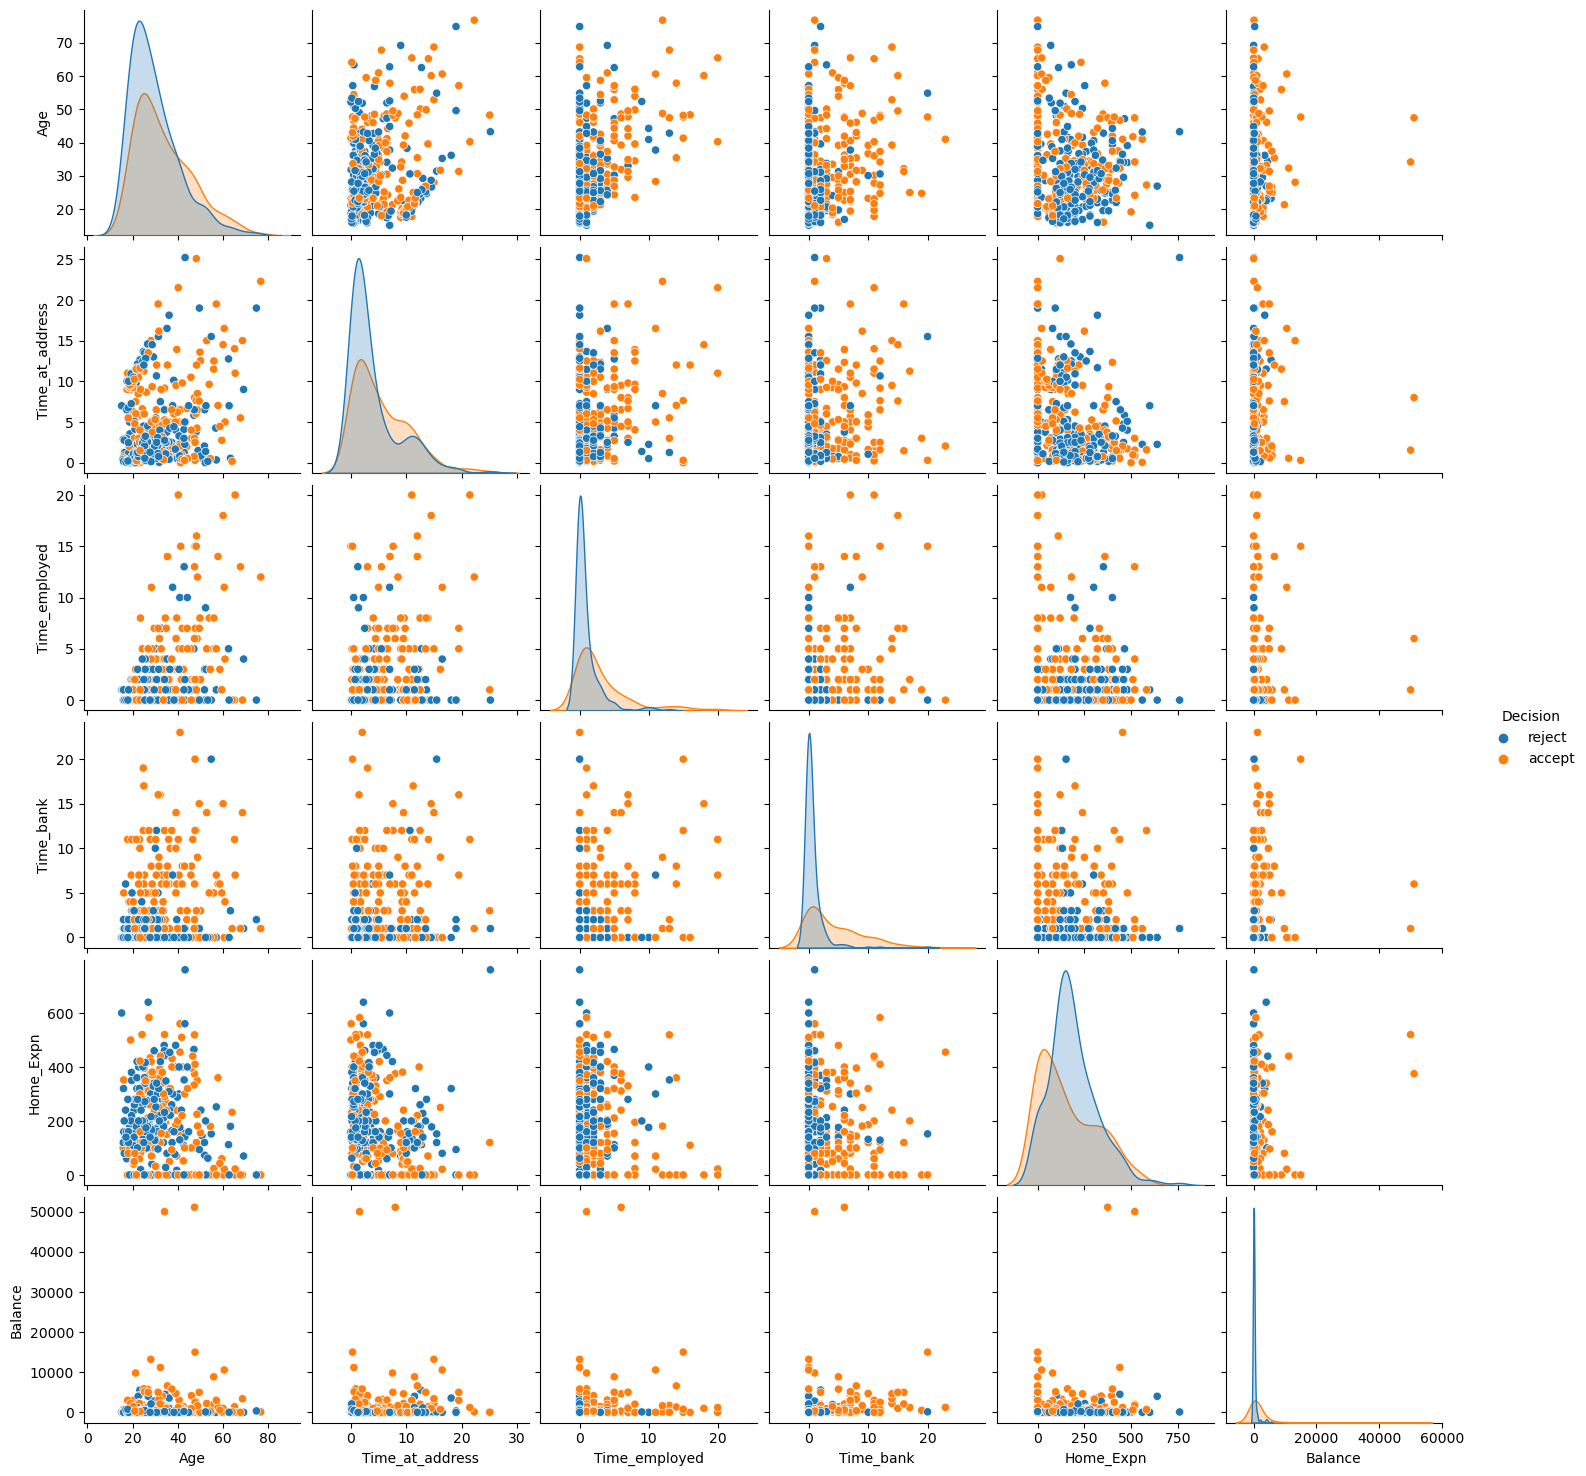

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(loan_df, hue='Decision')
plt.show()

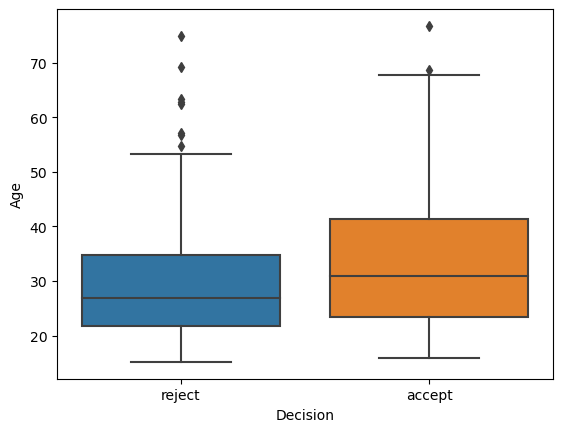

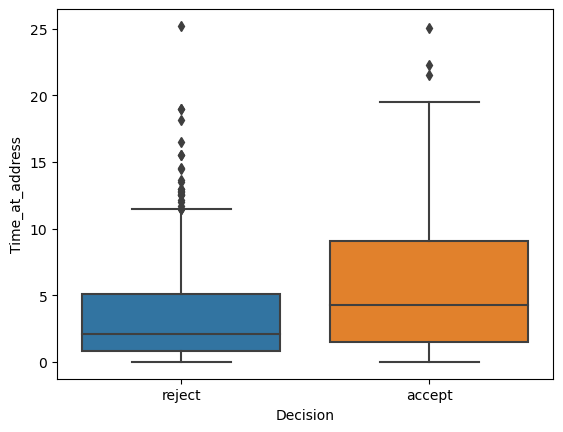

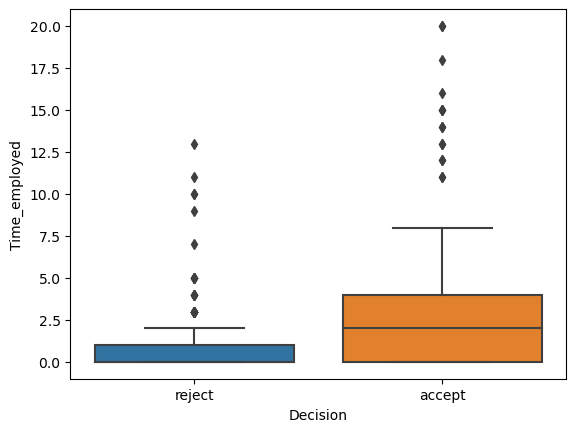

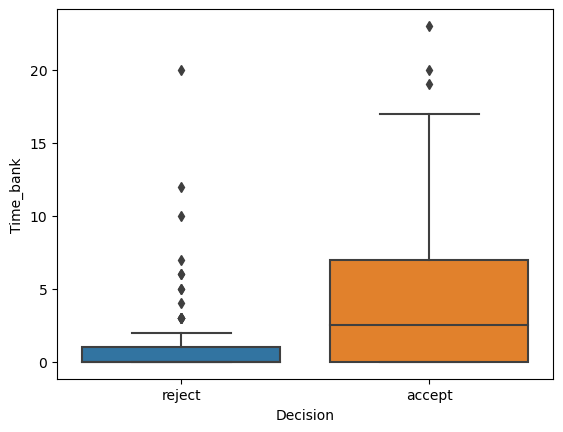

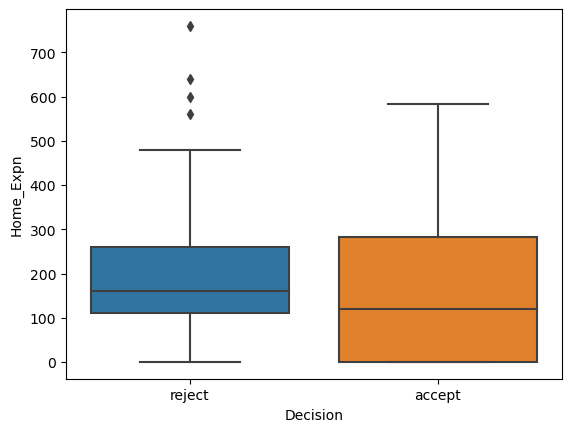

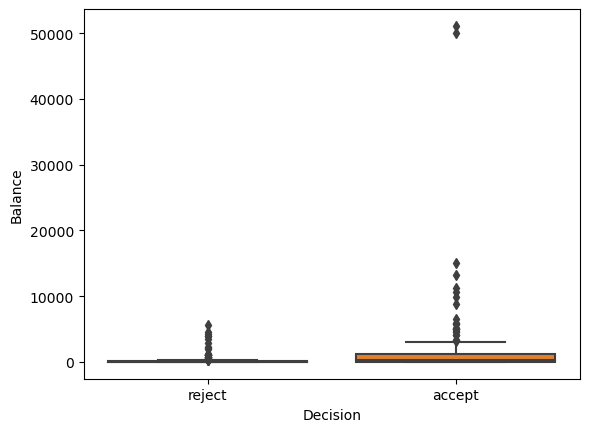

In [41]:
# boxplots
for column in numerical_columns:
    sns.boxplot(x='Decision', y=column, data=loan_df)
    plt.show()

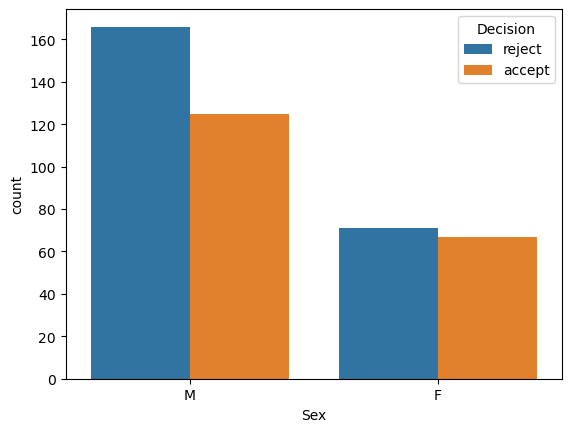

In [42]:
sns.countplot(x='Sex', hue='Decision', data=loan_df)
plt.show()

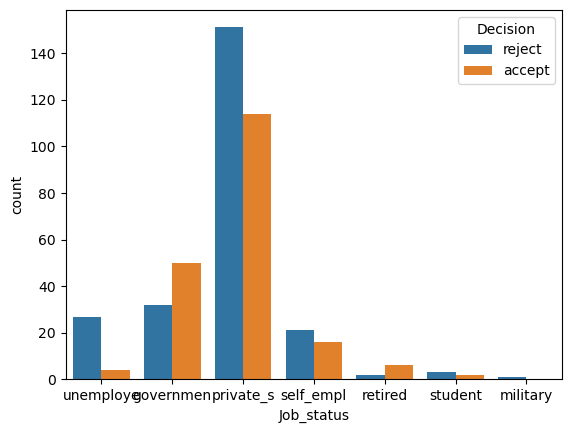

In [44]:
sns.countplot(x='Job_status', hue='Decision', data=loan_df)
plt.show()

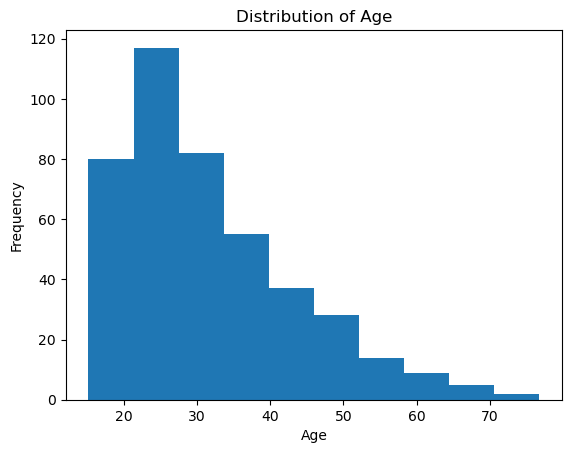

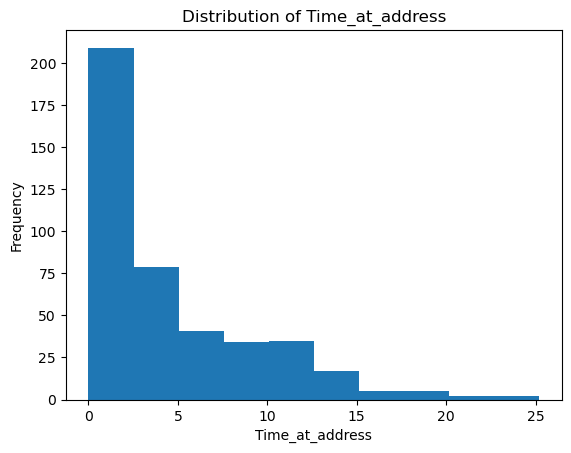

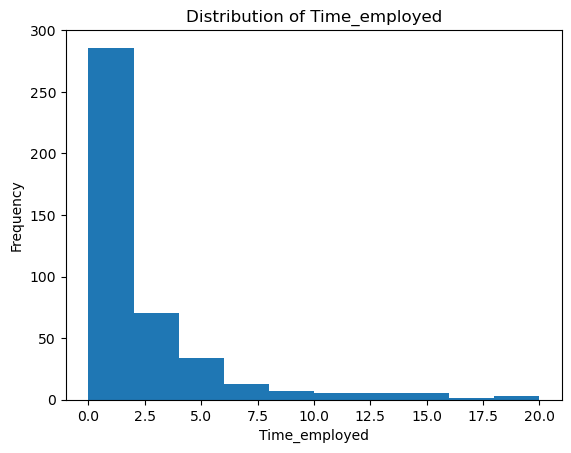

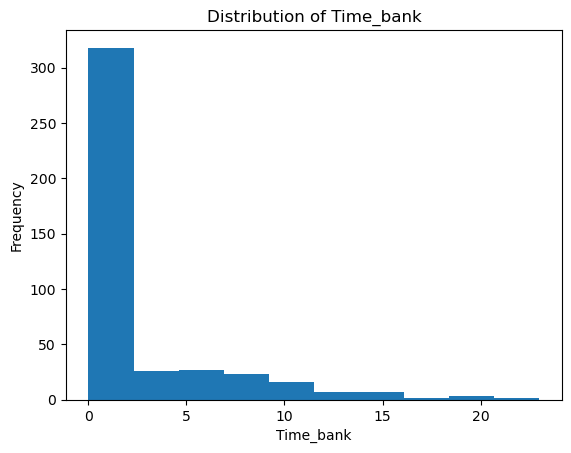

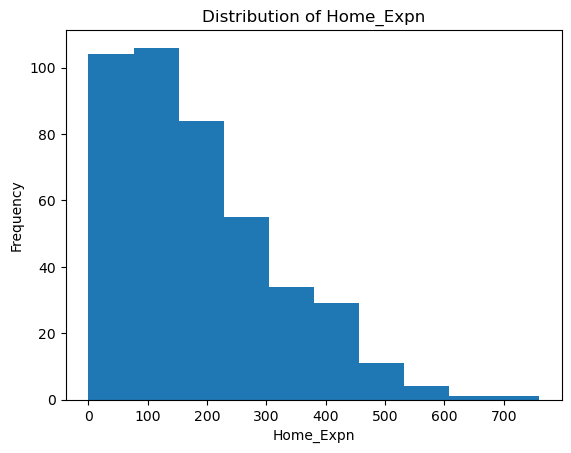

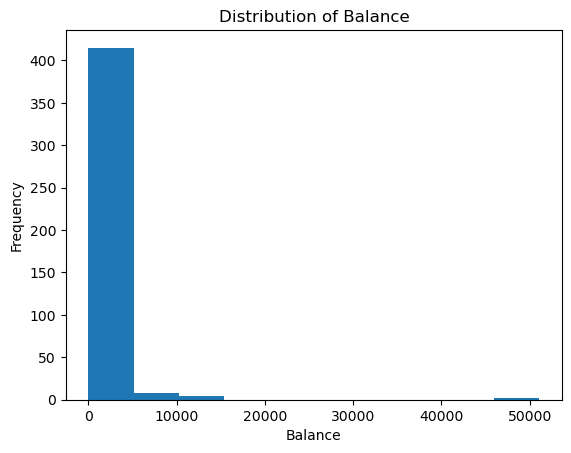

In [45]:
for column in numerical_columns:
    plt.hist(loan_df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Preparing the data

In [46]:
# Handling categorical variables
loan_df = pd.get_dummies(loan_df, columns=['Sex', 'Res_status', 'Occupation', 'Job_status'])

# Mapping binary categorical variables
loan_df['Liab_ref'] = loan_df['Liab_ref'].map({'f': 0, 't': 1})
loan_df['Telephone'] = loan_df['Telephone'].map({'given': 1, 'not_given': 0})
loan_df['Acc_ref'] = loan_df['Acc_ref'].map({'given': 1, 'oth_inst_': 0})

# Mapping target variable 'Decision'
loan_df['Decision'] = loan_df['Decision'].map({'accept': 1, 'reject': 0})

# Standardizing numerical features
scaler = StandardScaler()
numerical_columns = ['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Home_Expn', 'Balance']
loan_df[numerical_columns] = scaler.fit_transform(loan_df[numerical_columns])

In [47]:
loan_df.head()

,Age,Time_at_address,Telephone,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision,...,Occupation_sales,Occupation_semi_pro,Occupation_unemploye,Job_status_governmen,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye
0,1.626390,-0.847309,1,-0.575896,-0.575472,0,1,-0.222766,-0.235789,0,...,0,0,1,0,0,0,0,0,0,1
1,-1.000877,1.114789,0,-0.575896,-0.575472,1,1,-0.257872,-0.235789,0,...,0,0,0,1,0,0,0,0,0,0
2,1.802217,2.156795,1,0.962457,2.958561,0,1,-1.240850,0.341621,1,...,0,0,0,0,0,1,0,0,0,0
3,-0.747280,-0.439885,0,0.039445,-0.575472,0,1,-1.240850,-0.235789,1,...,0,0,0,1,0,0,0,0,0,0
4,-0.191057,1.739993,1,-0.575896,-0.575472,0,1,0.360000,-0.235789,0,...,0,0,0,1,0,0,0,0,0,0


In [48]:
# Splitting the data into features (X) and target variable (y)
X = loan_df.drop('Decision', axis=1)
y = loan_df['Decision']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Implementing the classifier

In [53]:
# Creating and training the neural network classifier
classifier = MLPClassifier(
    hidden_layer_sizes= (10,),  
    max_iter = 4000,
    random_state = 42,
    solver = 'adam',  
    activation = 'relu',  
    alpha = 0.0001,  
)
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=4000, random_state=42)

The code creates and trains a neural network classifier using scikit-learn's MLPClassifier with the following settings:
- One hidden layer with 10 neurons.
- Maximum of 4000 training iterations.
- Random seed set to 42 for reproducibility.
- Adam optimizer for weight optimization.
- Rectified Linear Unit (ReLU) activation function.
- Regularization parameter (alpha) set to 0.0001.

In [54]:
# Predictions on the test set
y_pred = classifier.predict(X_test)

In [55]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_matrix_output = confusion_matrix(y_test, y_pred)

In [56]:
# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_output)
print("Confusion Matrix:\n", confusion_matrix_output)

# Cross-validation for a more robust evaluation
cv_scores = cross_val_score(classifier, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")

Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68        43
           1       0.68      0.70      0.69        43

    accuracy                           0.69        86
   macro avg       0.69      0.69      0.69        86
weighted avg       0.69      0.69      0.69        86

Confusion Matrix:
 [[29 14]
 [13 30]]
Cross-Validation Scores: [0.80232558 0.75581395 0.84883721 0.73255814 0.74117647]
Mean Cross-Validation Score: 0.78


- The model achieves an accuracy of approximately 69%, indicating that it correctly predicts the target variable for about 69% of the instances in the test set.
- The precision, recall, and F1-score for both classes (0 and 1) are balanced, with values around 69%. This suggests that the model performs reasonably well for both accepted (class 1) and rejected (class 0) instances.
- The confusion matrix provides a detailed breakdown of correct and incorrect predictions. For example, there are 29 true negatives (correctly predicted as class 0), 30 true positives (correctly predicted as class 1), 14 false positives, and 13 false negatives. This information helps in understanding the types of errors the model makes.
- The cross-validation scores suggest that the model's performance is relatively consistent across different subsets of the data. The mean cross-validation score of approximately 78% indicates a stable performance.
- While the model shows reasonable performance, there is room for improvement. We can further explore using hyperparameter tuning, adjusting the neural network architecture, or exploring additional features to enhance model accuracy.

### Hyperparameter Tuning

In [57]:
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}


In [58]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    MLPClassifier(max_iter=5000, random_state=42),
    param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Use an appropriate scoring metric
    n_jobs=-1,  # Use parallel processing if available
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=5000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(10,), (20,), (30,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [59]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [60]:
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

In [61]:
print("Accuracy of the Best Model on Test Set:", accuracy_best)

Accuracy of the Best Model on Test Set: 0.6627906976744186


- The accuracy of the best model on the test set is approximately 66.28%. This is the accuracy achieved by the model with the hyperparameters identified through the grid search.

- We can further refine our parameter grid and repeat the process for better results.